In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

[-0.28930742 -0.58880963  1.02750749 ... -0.30516366  1.67583291
 -0.49175724] [-9.11011171e-02 -5.34677208e+01  7.54570088e+01 ... -3.49832749e+01
  1.45206092e+02 -1.71244939e+01]


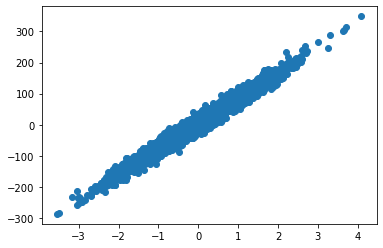

In [90]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")

dfx = dfx.values
dfy = dfy.values

x=dfx.reshape((-1,))
y=dfy.reshape((-1,))

print(x,y)

plt.plot(x,y,"o")

In [91]:
def hypothesis(x,theta):
     return theta[1]*x+theta[0]

In [92]:
def error(x,y,theta):
    error=0
    
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        error += (hx - y[i])**2
    return error    

In [93]:
def gradient(x,y,theta):
    grad = np.zeros((2,1),float)
    
    for i in range(x.shape[0]):
        hx = hypothesis(x[i],theta)
        grad[0] += (hx-y[i])
        grad[1] += (hx-y[i])*x[i]
    return grad    

In [94]:
def gradientdescent(x,y):
    theta = np.array([0.0,0.0],float)
    error_list = []
    theta_list = []
    lr = 0.001
    for i in range(100):
        err = error(x,y,theta)
        grad = gradient(x,y,theta)
        
        error_list.append(err)
        theta_list.append(theta)
        
        theta[0] -= lr*grad[0]
        theta[1] -= lr*grad[1]
        
    return theta,error_list


        
        
        

In [95]:
final_theta,error_list = gradientdescent(x,y)

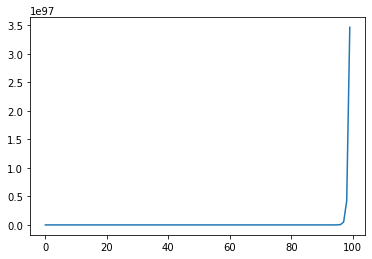

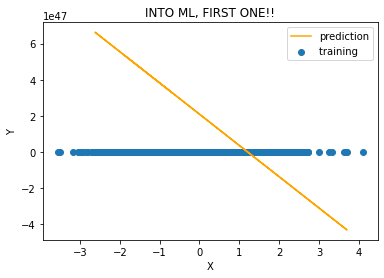

In [96]:

plt.plot(error_list)

plt.show()


test = pd.read_csv("Linear_X_Test.csv")
test = test.values

plt.scatter(x,y,label="training  ")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("INTO ML, FIRST ONE!!")

plt.plot(test,hypothesis(test,final_theta),color="orange", label = "prediction")
plt.legend()
plt.show()